# Simple Linear Regression

## In simple linear regression, we predict the output/dependent variable based on only one input feature. The simple linear regression is given by : 

## Y= m*x+c


## simple linear regression using the sklearn library in Python.

In [1]:
#import required libraries:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from sklearn.linear_model import LinearRegression

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'FuelConsumptionCo2.csv',
 'Simple Linear Regression.ipynb']

In [5]:
#Read CSV file 

data = pd.read_csv('FuelConsumptionCo2.csv')

In [8]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Select the features we want to consider in predicting values

In [19]:
X = np.array(data['ENGINESIZE']).reshape(-1,1)
y = np.array(data['CO2EMISSIONS']).reshape(-1,1)
print(X.shape)
print(y.shape)

(1067, 1)
(1067, 1)


## plot the data

Text(0, 0.5, 'Co2 Emission')

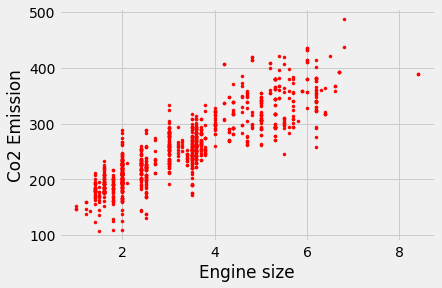

In [10]:
plt.scatter(X,y,c='r',marker='.')
plt.xlabel('Engine size')
plt.ylabel('Co2 Emission')

#### Divide the data into training and testing data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Train our model

In [22]:
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print("Coefficients: ",regr.coef_)          #slop
print("Intercept: ",regr.intercept_)        #Intercept

Coefficients:  [[39.18424416]]
Intercept:  [124.70912762]


## Plot the best fit line

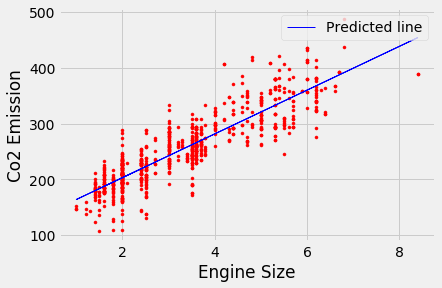

In [29]:
plt.scatter(X_train,y_train,c='r',marker='.')
plt.plot(X_train,regr.predict(X_train),c='b',linewidth=1)
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emission')
plt.legend(['Predicted line'],loc=1)

### Predicting co2 emissions

In [34]:
engine_size = np.array([[3.5]])
pred_test = regr.predict(engine_size)

In [35]:
print("Estimated Emission with engine size {} is: {}".format(engine_size,pred_test))

Estimated Emission with engine size [[3.5]] is: [[261.85398216]]


## Checking Accuracy for test data

In [38]:
from sklearn import metrics
test_pred = regr.predict(X_test)

In [48]:
print("Mean absolute error: %.2f"%np.mean(np.absolute(test_pred-y_test)))

print("Mean sum of squares (MSE): {}".format(np.mean((test_pred-y_test)**2)))

print("R2-score: %.2f"% metrics.r2_score(test_pred,y_test))


Mean absolute error: 22.23
Mean sum of squares (MSE): 879.3365523754075
R2-score: 0.68
